# Identify Cascading Dependencies

Studies the dependency file to figure out the extent to which there exist cascading dependencies; i.e., dependencies such that $A \to B \to C \to ...$, where $A,B,...$ are projects.

In [1]:
%reload_ext autoreload
%autoreload 2

## Presence of cascading dependencies

In [2]:
def print_perc(count, total):
    perc = count / total * 100
    print(f'{count} / {total} ({perc:.3f}%)')

In [3]:
from python_proj.data_preprocessing.sliding_window_features.dependency_ecosystem_experience.dependency_loading import (
    safe_load_dependency_map,
)

dependencies, _ = safe_load_dependency_map()

project_count = len(dependencies)

print(f"{project_count=}")

Attempting quick load dependencies.
Loading projects and dependencies from: "/workspaces/msc_thesis/data/libraries/npm-libraries-1.6.0-2020-01-12/ql_dependencies.csv".
Finished quick load!
Loaded 631066 projects and 1695834 projects with dependencies.
Loaded dependency data in 0:00:29.358884.
project_count=1695834


In [4]:
def calculate_cascade(level: int) -> int:
    count = 0
    proj_ids = set(dependencies.keys())
    for proj_id in proj_ids:
        if _has_cascade(level, proj_id):
            count += 1
    return count


def _has_cascade(level: int, project_id: int) -> bool:
    proj_deps = dependencies[project_id]
    if level == 0:
        return len(proj_deps) > 0
    has_cascading = any(_has_cascade(level - 1, dep) for dep in proj_deps)
    return has_cascading

In [5]:
cascade_counts = []

# The results plateau around 89%
for level in range(1, 5):
    cascade_count = calculate_cascade(level)
    cascade_counts.append((level, cascade_count))
    print(f"Cascade level {level}:")
    print_perc(cascade_count, project_count)

Cascade level 1:
1616617 / 1695834 (95.329%)
Cascade level 2:
1588646 / 1695834 (93.679%)
Cascade level 3:
1575055 / 1695834 (92.878%)
Cascade level 4:
1567977 / 1695834 (92.461%)


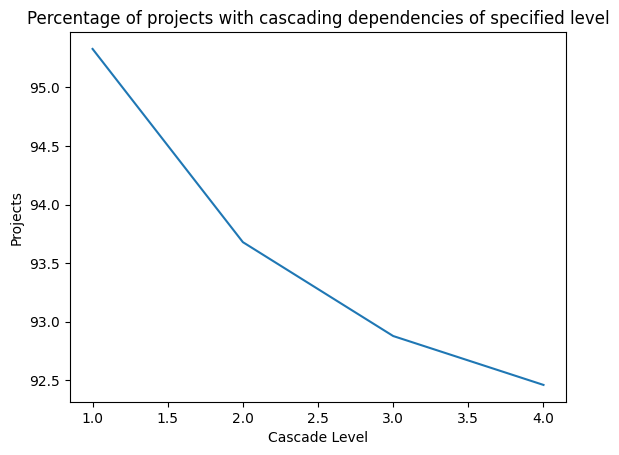

In [6]:
import matplotlib.pyplot as plt

# Input data: array of tuples containing x and y coordinates

# Unpacking the tuples into separate lists for x and y coordinates
x_values = [point[0] for point in cascade_counts]
y_values = [point[1] / project_count * 100 for point in cascade_counts]

# Creating the line plot
plt.plot(x_values, y_values)

# Adding labels and title
plt.xlabel("Cascade Level")
plt.ylabel("Projects")
plt.title("Percentage of projects with cascading dependencies of specified level")

# Displaying the plot
plt.show()

## Transitive dependencies

In [7]:
old_dep_count = {proj_id: len(dependencies[proj_id]) for proj_id in dependencies.keys()}
old_avg_len = sum(old_dep_count.values()) / len(old_dep_count)

print(f'{old_avg_len=}')

old_avg_len=55.49258538068213


In [8]:
from python_proj.data_preprocessing.sliding_window_features.dependency_ecosystem_experience.dependency_loading import (
    calculate_transitive_dependency_map,
)

dependencies = calculate_transitive_dependency_map(dependencies, max_iter=5)

KeyboardInterrupt: 

In [ ]:
new_dep_count = {proj_id: len(dependencies[proj_id]) for proj_id in dependencies.keys()}
new_avg_len = sum(new_dep_count.values()) / len(new_dep_count)

print(f'{new_avg_len=}')

new_avg_len=53.43002341480655


In [ ]:
delta_dep_count = {
    proj_id: new_dep_count[proj_id] - old_dep_count[proj_id]
    for proj_id in old_dep_count.keys()
}
delta_total_dep_count = sum(delta_dep_count.values())
delta_avg_len = delta_total_dep_count / len(delta_dep_count)

print(f"{delta_total_dep_count=}")
print(f"{delta_avg_len=}")

delta_total_dep_count=0
delta_avg_len=0.0
